## kaggle 데이터 연습

In [4]:
import pandas as pd 

train = pd.read_csv("kaggle_data/test.csv")
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [2]:
train.shape

(11504798, 12)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669866 entries, 0 to 7669865
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Age_Group             object 
dtypes: float64(3), int64(5), object(4)
memory usage: 702.2+ MB


## 문제 1. 
- 나이 그룹 분류 : 'Age_Group'이라는 새로운 열이 추가하도록 한다. Age를 'Young', 'Middle-Aged', 'Senior'으로 분류합니다.
- 분류 기준
  + 30세 이하는 Young
  + 50세 이하는 Middle-Aged
  + 그 외는 Senior로 분류

In [26]:
# code

train['Age_Group'] = train['Age'].apply(lambda x: 'Young' if x <= 30 else ('Middle-Aged' if x <= 50 else 'Senior'))
train.head(1)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_Group
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228,Young


## 문제 2. 
- 성별에 따른 연간 보험료 평균을 구하세요
    + 컬럼 : Annual_Premium, Gender

In [27]:
# code
train.groupby('Gender')['Annual_Premium'].mean()

Gender
Female    30281.053041
Male      30621.872921
Name: Annual_Premium, dtype: float64

## 문제 3. 
- Gender는 남성이면서, 이전에 보험에 가입하지 않았으며, 차량 연식 < 1년 이하인 값을 구하세요.
- 컬럼 정보 : Gender, Previously_Insured, Vehicle_Age

In [32]:
# code

#꼭 틀 짜고 시작 [(조건식1) & (조건식2) & (조건식3),:]

train.loc[(train['Gender'] == "Male") & (train['Previously_Insured'] == 0) & (train['Vehicle_Age'] == "< 1 Year") ,:].reset_index(drop = True)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_Group
0,11504809,Male,34,1,29.0,0,< 1 Year,No,2630.0,1.0,102,Middle-Aged
1,11504823,Male,31,1,28.0,0,< 1 Year,Yes,50579.0,152.0,263,Middle-Aged
2,11504847,Male,21,1,32.0,0,< 1 Year,Yes,28178.0,152.0,252,Young
3,11504859,Male,31,1,8.0,0,< 1 Year,Yes,50701.0,152.0,175,Middle-Aged
4,11504862,Male,21,1,8.0,0,< 1 Year,No,56927.0,160.0,68,Young
...,...,...,...,...,...,...,...,...,...,...,...,...
509699,19174552,Male,27,1,18.0,0,< 1 Year,No,2630.0,152.0,265,Young
509700,19174571,Male,20,1,12.0,0,< 1 Year,No,25242.0,160.0,263,Young
509701,19174602,Male,26,1,2.0,0,< 1 Year,Yes,28579.0,152.0,21,Young
509702,19174621,Male,20,1,6.0,0,< 1 Year,Yes,2630.0,160.0,87,Young


## 문제 4. 
- Policy_Sales_Channel이 7.0 또는 152.0인 데이터를 필터링 하세요

In [34]:
train.loc[(train['Policy_Sales_Channel'] == 7.0) | (train['Policy_Sales_Channel'] == 152.0) ,:].reset_index(drop = True)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_Group
0,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115,Young
1,11504803,Male,22,1,30.0,1,< 1 Year,No,25715.0,152.0,245,Young
2,11504804,Female,23,1,20.0,0,< 1 Year,Yes,2630.0,152.0,11,Young
3,11504807,Male,33,1,28.0,1,< 1 Year,No,46937.0,152.0,72,Middle-Aged
4,11504810,Female,25,1,28.0,1,< 1 Year,No,29574.0,152.0,36,Young
...,...,...,...,...,...,...,...,...,...,...,...,...
2805626,19174647,Male,29,1,28.0,1,< 1 Year,No,43394.0,152.0,92,Young
2805627,19174648,Female,26,1,32.0,0,< 1 Year,Yes,38718.0,152.0,164,Young
2805628,19174654,Male,24,1,8.0,1,< 1 Year,No,34334.0,152.0,82,Young
2805629,19174660,Male,28,1,50.0,1,< 1 Year,No,25651.0,152.0,184,Young


### 층화추출

In [7]:
stratified_sample = train.groupby('Response').apply(
    lambda x: x.sample(frac=0.001)
)

stratified_sample.to_csv("kaggle_test.csv", index=False)

C:\Users\pcuser\AppData\Local\Temp\ipykernel_20356\1063128695.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = train.groupby('Response').apply(


## 시각화

In [35]:
import matplotlib.pyplot as plt

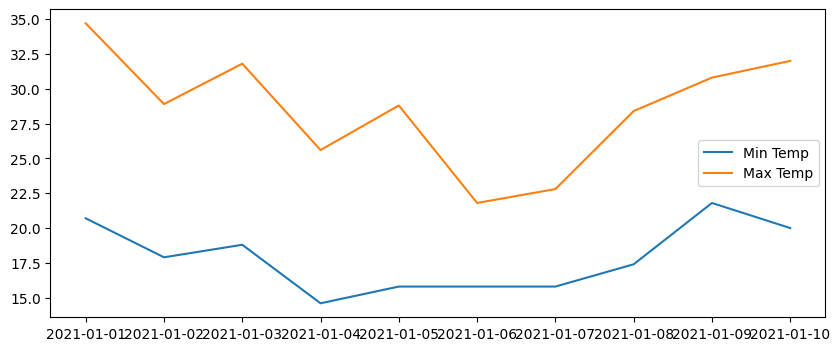

In [48]:
dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

# 객체지향 형태로 문법 쓰기!

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dates, min_temperature, label = 'Min Temp')
ax.plot(dates, max_temperature, label = 'Max Temp')

# print(type(ax)):  <class 'matplotlib.axes._axes.Axes'>

ax.legend(loc='right')
# ax.set_xlable

In [49]:
!pip install yfinance --upgrade --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 5.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 14.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-cp311-cp311-macosx_11_0_arm64.whl size=246398 sha256=ac0c0d0a096b4af6454e22a05819a716c74986e5ad5f88818585566f78928bb3
  Stored in directory: /private/var/folders/zk/p59k4t_16mlgf68b5hxclv6m0000gn/T/pip-ephem-wheel-cache-bd9na42w/wheels/d2/cb/9c/c300d7bf782e07f1658c306743d5e30af7e4834001e4064a96
Successfully built peewee

[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [61]:
import yfinance as yf

data = yf.download("RVSN", start = '2020-01-01', end = '2024-07-02')

data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-31,25.120001,25.120001,19.600000,24.719999,24.719999,616663
2022-04-01,20.879999,22.320000,19.600000,21.760000,21.760000,271363
2022-04-04,20.719999,20.719999,17.368000,19.520000,19.520000,209375
2022-04-05,18.799999,22.000000,18.400000,20.240000,20.240000,235125
2022-04-06,19.600000,20.719999,18.879999,19.600000,19.600000,117725


In [62]:
data['Open'].index

DatetimeIndex(['2022-03-31', '2022-04-01', '2022-04-04', '2022-04-05',
               '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-11',
               '2022-04-12', '2022-04-13',
               ...
               '2024-06-17', '2024-06-18', '2024-06-20', '2024-06-21',
               '2024-06-24', '2024-06-25', '2024-06-26', '2024-06-27',
               '2024-06-28', '2024-07-01'],
              dtype='datetime64[ns]', name='Date', length=565, freq=None)

/var/folders/zk/p59k4t_16mlgf68b5hxclv6m0000gn/T/ipykernel_5802/1644161309.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['Open'].index, rotation = 30)


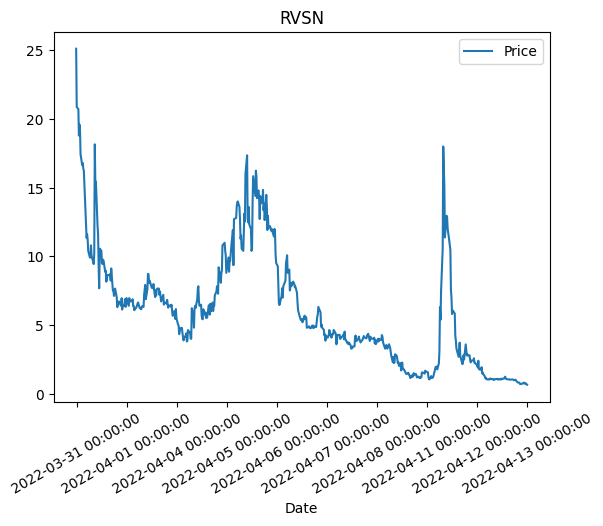

In [63]:
fig, ax = plt.subplots()

ax.plot(data['Open'])

ax.set_title('RVSN')

ax.legend(labels = ['Price'], loc = 'best')

ax.set_xlabel('Date')
ax.set_xticklabels(data['Open'].index, rotation = 30)

plt.show()

/var/folders/zk/p59k4t_16mlgf68b5hxclv6m0000gn/T/ipykernel_5802/1430571292.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=['setosa', 'versicolor', 'virginica'])
/var/folders/zk/p59k4t_16mlgf68b5hxclv6m0000gn/T/ipykernel_5802/1430571292.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


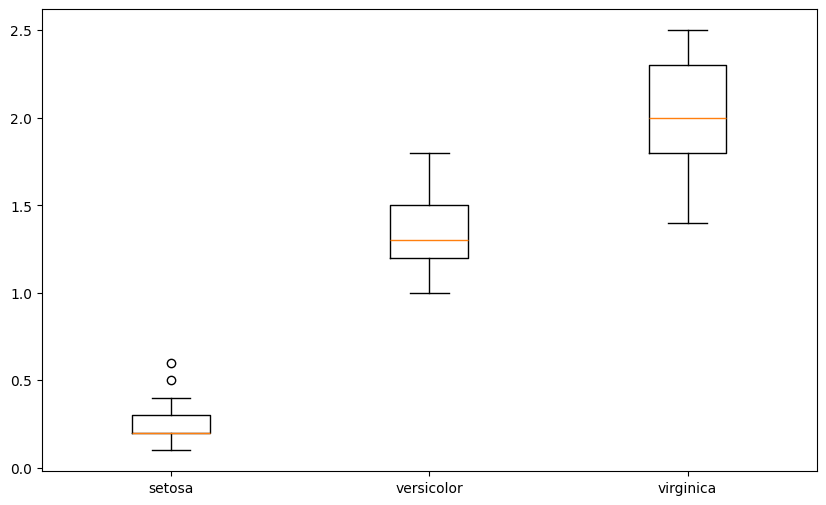

In [64]:
# matplotlib으로 그리는 방법

import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

data = [iris[iris['species']=="setosa"]['petal_width'], 
        iris[iris['species']=="versicolor"]['petal_width'],
        iris[iris['species']=="virginica"]['petal_width']]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data, labels=['setosa', 'versicolor', 'virginica'])

fig.show()

<class 'matplotlib.axes._axes.Axes'>


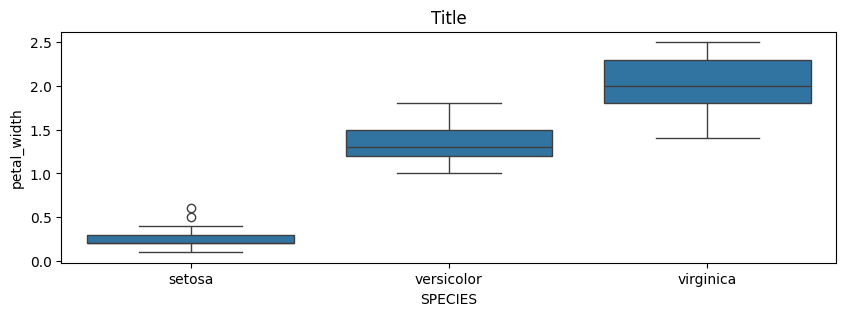

In [70]:
#seaborn으로 그리는 방법

import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

data = [iris[iris['species']=="setosa"]['petal_width'], 
        iris[iris['species']=="versicolor"]['petal_width'],
        iris[iris['species']=="virginica"]['petal_width']]

train.loc[(train['Gender'] == "Male") & (train['Previously_Insured'] == 0) & (train['Vehicle_Age'] == "< 1 Year") ,:].reset_index(drop = True)
ax.set_title('Title')
ax.set_xlabel('SPECIES')
print(type(ax))

plt.show()

## 막대 그래프 그려보기

In [73]:
# 라이브러리 불러오기

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

In [74]:
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0, 'Thur')
Text(1, 0, 'Fri')
Text(2, 0, 'Sat')
Text(3, 0, 'Sun')


/var/folders/zk/p59k4t_16mlgf68b5hxclv6m0000gn/T/ipykernel_5802/500087212.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)


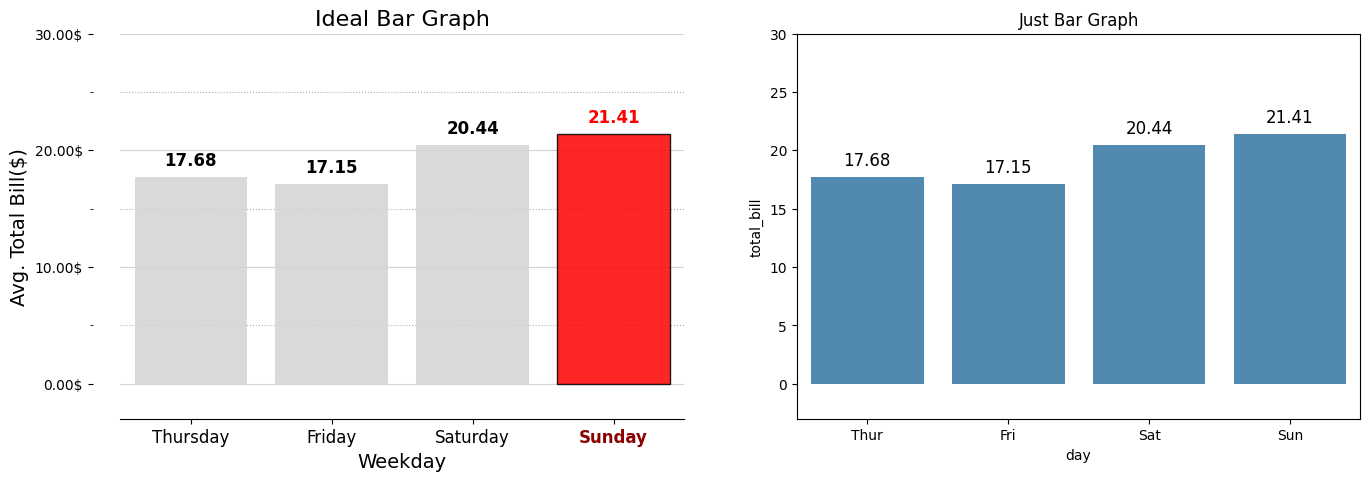

In [119]:
# 시각화 객체지향 선언

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

ax0 = sns.barplot(x = 'day', y = 'total_bill', data = tips, errorbar = None, color = 'lightgray', alpha = 0.85, zorder = 2, ax= ax[0])

for p in ax0.patches:
    
    # print(p, type(p))
    
    fontweight= "bold"
    color = 'k'
    height = np.round(p.get_height(),2)
    
    #print(height)
    
    if h_mean == height: 
        # Sun이면 색상을 다르게 주겠다
        fontweight = 'bold'
        color = 'red'
        p.set_facecolor(color)
        p.set_edgecolor('black')
    
    #else:
    #   p.set_facecolor(color)
    #   p.set_edgecolor('yellow')
    
    ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center',
           size=12,
           fontweight=fontweight, color=color)


#축 옵션 UDF 함수

def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)



ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

ax0.set_xlabel("Weekday", fontsize=14)

for xtick in ax0.get_xticklabels():
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)




ax1 = sns.barplot(x = 'day', y = 'total_bill', data = tips, errorbar = None, alpha = 0.85, ax= ax[1])




for p in ax1.patches:
  height = np.round(p.get_height(), 2)
  ax1.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")


plt.show()


In [109]:
group_mean = tips.groupby(['day'], observed = False)['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
#h_day = group_mean.idxmax()

h_mean = float(np.round(group_mean.sort_values(ascending=False).values[0],2))
h_day, h_mean

('Sun', 21.41)